In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# HR Data: Predicting Employee Churn
## Author: Yordan Darakchiev & the Data Science Course Students

In [3]:
hr_data = pd.read_csv("data/HR_comma_sep.csv")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.shape

(14999, 10)

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr_data.columns = ["satisfaction_level", "last_evaluation", "num_projects",
                   "average_monthly_hours", "time_spent", "work_accident", "left",
                   "promotion_last_5_years", "department", "salary"]

hr_data = hr_data[["satisfaction_level", "last_evaluation", "num_projects",
                    "average_monthly_hours", "time_spent", "work_accident",
                    "promotion_last_5_years", "department", "salary", "left"]]
hr_data.head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,time_spent,work_accident,promotion_last_5_years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [7]:
hr_data.work_accident = hr_data.work_accident.astype(np.bool)
hr_data.promotion_last_5_years = hr_data.promotion_last_5_years.astype(np.bool)
hr_data.left = hr_data.left.astype(np.bool)

In [8]:
hr_data.dtypes

satisfaction_level        float64
last_evaluation           float64
num_projects                int64
average_monthly_hours       int64
time_spent                  int64
work_accident                bool
promotion_last_5_years       bool
department                 object
salary                     object
left                         bool
dtype: object

In [9]:
hr_data.salary = hr_data.salary.astype("category")
hr_data.department = hr_data.department.astype("category")

In [10]:
def plot_distribution(distribution, min_value, max_value, title, x_label):
    plt.bar(distribution.index, distribution)
    plt.xticks(np.arange(min_value, max_value + 1))
    plt.xlabel(x_label)
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

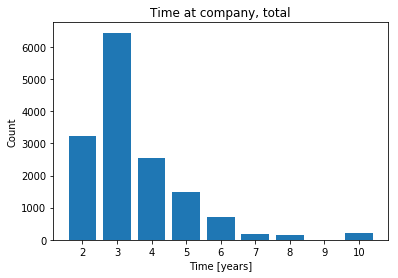

In [11]:
min_value, max_value = hr_data.time_spent.min(), hr_data.time_spent.max()
plot_distribution(hr_data.groupby("time_spent").size(), min_value, max_value, "Time at company, total", "Time [years]")

In [12]:
left_employees = hr_data[hr_data.left]
remained_employees = hr_data[~(hr_data.left)]

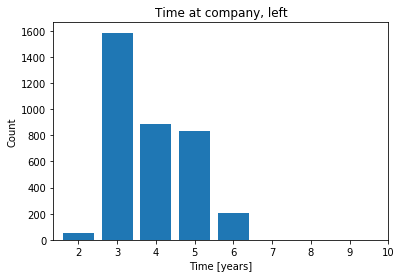

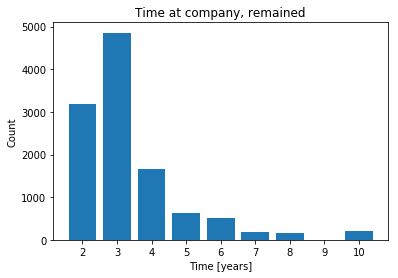

In [13]:
plot_distribution(left_employees.groupby("time_spent").size(), min_value, max_value, "Time at company, left", "Time [years]")
plot_distribution(remained_employees.groupby("time_spent").size(), min_value, max_value, "Time at company, remained", "Time [years]")

In [14]:
len(hr_data[hr_data.left]) / len(hr_data)

0.2380825388359224

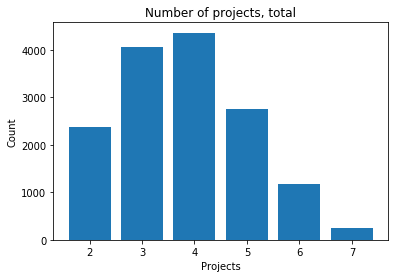

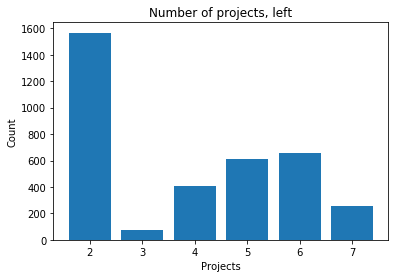

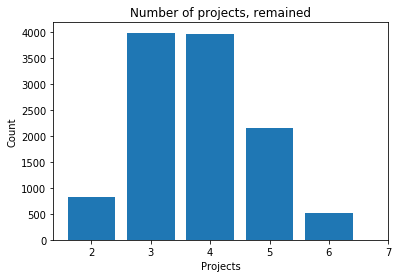

In [15]:
min_value, max_value = hr_data.num_projects.min(), hr_data.num_projects.max()

plot_distribution(hr_data.groupby("num_projects").size(), min_value, max_value, "Number of projects, total", "Projects")
plot_distribution(left_employees.groupby("num_projects").size(), min_value, max_value, "Number of projects, left", "Projects")
plot_distribution(remained_employees.groupby("num_projects").size(), min_value, max_value, "Number of projects, remained", "Projects")

In [16]:
projects_per_year = hr_data.num_projects / hr_data.time_spent
projects_per_year_left = left_employees.num_projects / left_employees.time_spent
projects_per_year_remained = remained_employees.num_projects / remained_employees.time_spent

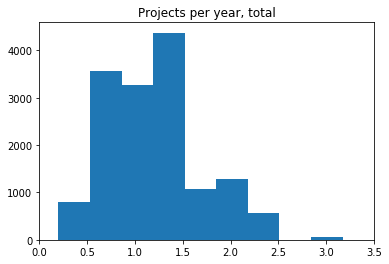

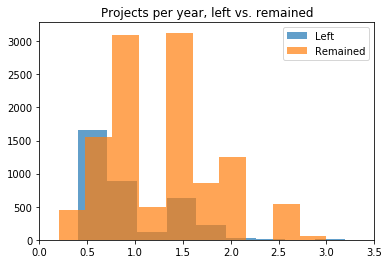

In [17]:
plt.hist(projects_per_year)
plt.title("Projects per year, total")
plt.xlim([0, 3.5])
plt.show()

plt.hist(projects_per_year_left, alpha = 0.7, label = "Left")
plt.hist(projects_per_year_remained, alpha = 0.7, label = "Remained")
plt.title("Projects per year, left vs. remained")
plt.xlim([0, 3.5])
plt.legend()
plt.show()

In [18]:
hr_data.groupby("salary").size()

salary
high      1237
low       7316
medium    6446
dtype: int64

In [19]:
left_employees.groupby("salary").size()

salary
high        82
low       2172
medium    1317
dtype: int64

In [20]:
remained_employees.groupby("salary").size()

salary
high      1155
low       5144
medium    5129
dtype: int64

In [21]:
salary_and_left = pd.crosstab(hr_data.left, hr_data.salary)[["low", "medium", "high"]]
salary_and_left

salary,low,medium,high
left,,,
False,5144,5129,1155
True,2172,1317,82


In [22]:
chi2_contingency(salary_and_left)[1]

1.6520867492959581e-83

In [23]:
chi2_contingency(pd.crosstab(hr_data.left, hr_data.work_accident))[1]

9.5582395800219898e-80

In [24]:
print("Employee satisfaction level")
print("Left: {:.2f}; remained: {:.2f}".format(left_employees.satisfaction_level.mean(), remained_employees.satisfaction_level.mean()))
print()
print("Employer satisfaction level")
print("Left: {:.5f}; remained: {:.5f}".format(left_employees.last_evaluation.mean(), remained_employees.last_evaluation.mean()))

Employee satisfaction level
Left: 0.44; remained: 0.67

Employer satisfaction level
Left: 0.71811; remained: 0.71547


In [25]:
hr_data.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

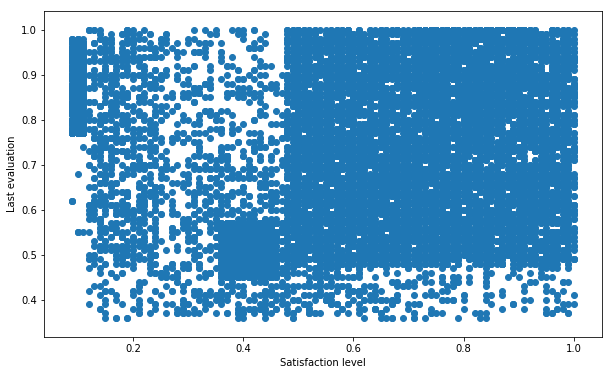

In [26]:
plt.figure(figsize = (10, 6))
plt.scatter(hr_data.satisfaction_level, hr_data.last_evaluation)
plt.xlabel("Satisfaction level")
plt.ylabel("Last evaluation")
plt.show()

In [27]:
too_hard_workers = hr_data[(hr_data.satisfaction_level < 0.2) & (hr_data.last_evaluation > 0.8)]
print(len(too_hard_workers))
print(len(too_hard_workers[hr_data.left]))

895
729


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
employees_by_department = hr_data.groupby("department").size().sort_values(ascending = False)

left_by_department = left_employees.groupby("department").size().sort_values(ascending = False)

(left_by_department / employees_by_department).sort_values(ascending = False)

department
hr             0.290934
accounting     0.265971
technical      0.256250
support        0.248991
sales          0.244928
marketing      0.236597
IT             0.222494
product_mng    0.219512
RandD          0.153748
management     0.144444
dtype: float64

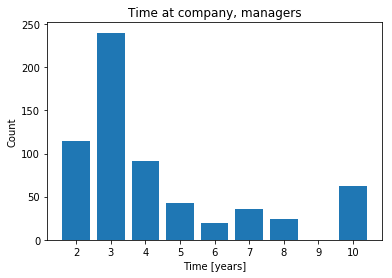

In [29]:
managers = hr_data[hr_data.department == "management"]

min_value, max_value = managers.time_spent.min(), managers.time_spent.max()
plot_distribution(managers.groupby("time_spent").size(), min_value, max_value, "Time at company, managers", "Time [years]")

In [30]:
hr_data[hr_data.time_spent == 10].groupby("department").size().sort_values(ascending = False)

department
management     62
sales          58
support        26
technical      20
IT             16
marketing      12
product_mng    10
accounting     10
hr              0
RandD           0
dtype: int64

In [31]:
hr_data[(hr_data.time_spent == 10) & (hr_data.salary == "high")].groupby("department").size().sort_values(ascending = False)

department
management     48
sales           8
technical       2
support         2
product_mng     2
marketing       2
hr              0
accounting      0
RandD           0
IT              0
dtype: int64

In [32]:
hr_data[(hr_data.time_spent == 10)].groupby("department").satisfaction_level.mean().sort_values(ascending = False)

department
accounting     0.752000
IT             0.720000
technical      0.714000
management     0.673871
support        0.661538
product_mng    0.650000
sales          0.613793
marketing      0.486667
RandD               NaN
hr                  NaN
Name: satisfaction_level, dtype: float64

In [33]:
pd.crosstab(hr_data.promotion_last_5_years, hr_data.left)

left,False,True
promotion_last_5_years,,
False,11128,3552
True,300,19


In [34]:
len(hr_data[hr_data.promotion_last_5_years]) / len(hr_data)

0.021268084538969265

In [35]:
len(remained_employees[remained_employees.promotion_last_5_years]) / len(remained_employees)

0.026251312565628283

In [36]:
len(left_employees[left_employees.promotion_last_5_years]) / len(left_employees)

0.005320638476617194

In [37]:
hr_data.corr()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,time_spent,work_accident,promotion_last_5_years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
num_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spent,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


In [38]:
features = hr_data.drop("left", axis = 1)
target = hr_data.left

features = pd.get_dummies(features)

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            train_size = 0.7, test_size = 0.3, stratify = hr_data.left)
print(target_test.shape)
model = LogisticRegression(C = 1)
model.fit(features_train, target_train)

(4500,)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
model.score(features_test, target_test)

0.78755555555555556

In [40]:
employee = hr_data.sample(n = 1)
print(employee.left)

13262    False
Name: left, dtype: bool


In [41]:
employee_features = employee.drop("left", axis = 1)
employee_features = pd.get_dummies(employee_features)

In [42]:
model.predict(employee_features)

array([False], dtype=bool)